# 정규화 선형회귀
- `정규화 선형회귀 regularized linear regression` : 선형회귀 계수(weight)에 대한 제약 조건을 추가함으로써 모형의 과최적화를 막는 방법
    - regularized method, penalized method, contrained least squares 등으로 불림
- 모형이 과최적화가 되면 계수의 크기도 크게 증가하는 경향이 있다.
- 정규화 방법은 계수의 크기를 제한하는 방법과 같다.
    - **Ridge 회귀모형**
    - **Lasso 회귀모형**
    - **Elastic Net 회귀모형**
    
## 1. Ridge 회귀모형
- `Ridge 회귀모형` : 가중치들의 제곱합을 최소화 하는 것을 추가적인 제약조건으로 한다. 
    - $w = \arg \underset{w}{min} \left(\sum_{i=1}^{N} e_i^2 + \lambda \sum_{j=1}^{M} w_j^2 \right)$
    - RSS + (hyper parameter) * 가중치의 제곱합
- \lambda : 잔차 제곱합과 추가적인 제약 조건의 비중을 조절하는 하이퍼 모수(hyper parameter)
    - \lambda가 커지면 : 정규화 정도가 커지고, 가중치 값들이 작아진다.
    - \lambda가 작아지면 : 정규화 정도가 작아진다. 
    - \lambda = 0 : 일반 선형회귀 모형

## 2. Lasso 회귀모형
- `Lasso (Least Absolute Shrinkage and Selection Operator) 회귀모형` : 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약조건으로 한다.
    - $w = \arg \underset{w}{min} \left(\sum_{i=1}^{N} e_i^2 + \lambda \sum_{j=1}^{M} |w_j|  \right)$
    
## 3. Elastic Net 회귀모형
- `Elastic Net 회귀모형` : 가중치의 절대값의 합과 동시에 제곱합을 제약 조건으로 가지는 모형
    - ridge와 lasso의 제약조건을 동시에 갖는 제약조건
    - $w = \arg \underset{w}{min} \left(\sum_{i=1}^{N} e_i^2 + \lambda_1 \sum_{j=1}^{M} |w_j| + \lambda_2 \sum_{j=1}^{M} w_j^2  \right)$

## 4. stats models의 정규화 회귀모형
- Elastic Net 모형의 하이퍼 모수 식
    - $0.5×RSS/N+\text{alpha}×(0.5×(1−\text{L1_wt})∑w2i+\text{L1_wt}∑|wi|)$    
- fit_regularized 메서드를 사용해서 Elastic Net 회귀모형 계수를 구할 수 있다.
    - model.fit_regularized(alpha=0.01, L1_wt=0)
    - ridge와 lasso는 모수의 값 설정으로 구한다.
    - L1_wt=0 : Ridge 모형
    - L1_wt=1 : Lasso 모형
    - L1_wt=0과 1사이의 실수 : Elastic Net 모형    

In [2]:
def make_nonlinear(seed=0) : 
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    return (X, y)

In [3]:
X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)
df.head()

,const,x,y
0,1.0,0.020218,0.213138
1,1.0,0.071036,0.357444
2,1.0,0.087129,0.747487
3,1.0,0.118274,0.531167
4,1.0,0.143353,0.788347


In [15]:
model = sm.OLS.from_formula("y ~ " + "+".join([
    "I(x**"+str(i)+")" for i in range(1, 10)]), data=df)
result1 = model.fit()
result1.params

Intercept       -0.169863
I(x ** 1)       25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723113
I(x ** 4)   -18340.939657
I(x ** 5)    49326.072526
I(x ** 6)   -78884.743043
I(x ** 7)    74538.645124
I(x ** 8)   -38453.132176
I(x ** 9)     8350.254983
dtype: float64

In [10]:
"+".join(["I(x**"+str(i)+")" for i in range(2, 10)])

'I(x**2)+I(x**3)+I(x**4)+I(x**5)+I(x**6)+I(x**7)+I(x**8)+I(x**9)'

In [20]:
def plot_statsmodels(result) : 
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()

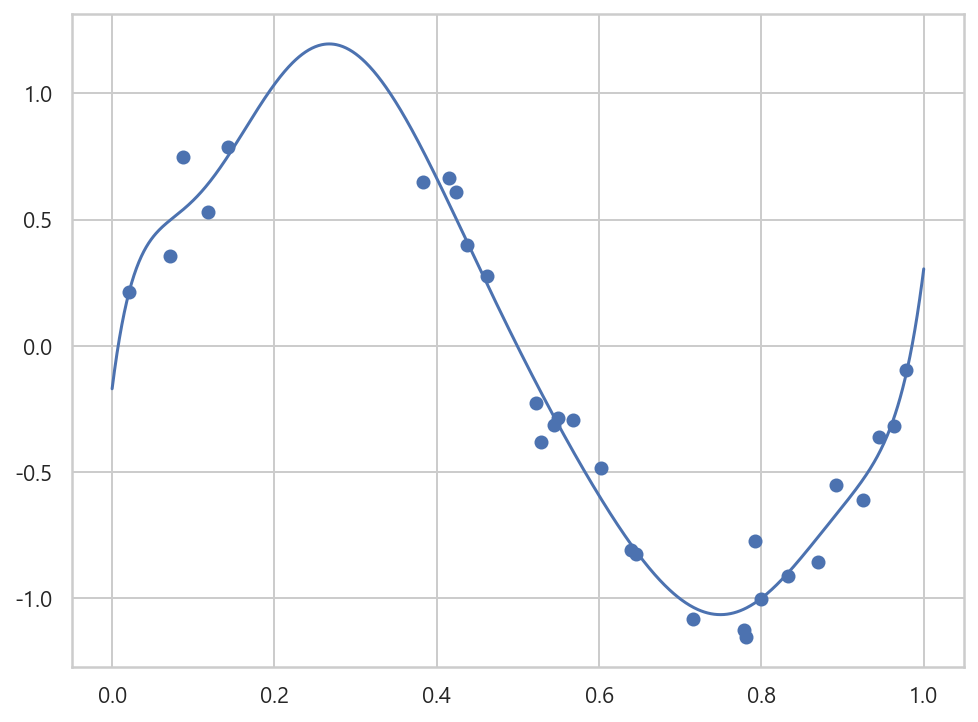

In [23]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plot_statsmodels(result1)

### 4-1. Ridge 모형
- L1_wt = 0

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


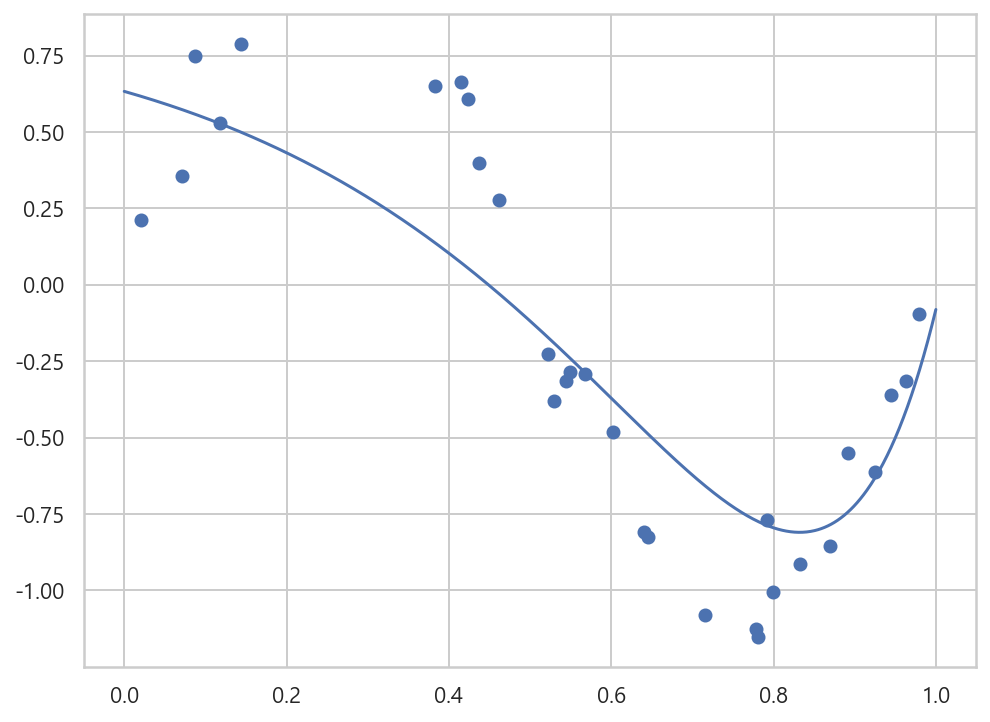

In [25]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)

plt.figure(figsize=(8, 6))
plot_statsmodels(result2)

### 4-2. Lasso 모형
- L1_wt : 1

Intercept    0.687949
I(x ** 1)   -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


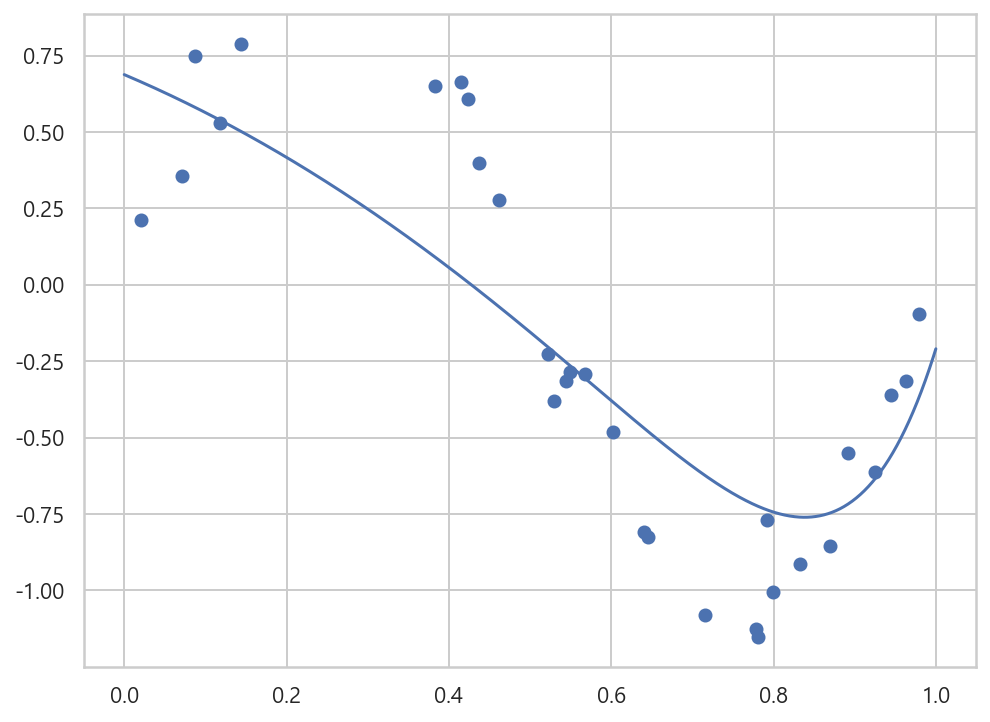

In [26]:
result3 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result3.params)

plt.figure(figsize=(8, 6))
plot_statsmodels(result3)

### 4-3. Elastic Net 모형
- L1_wt = 0.5 (0과 1사이의 실수)

Intercept    0.656203
I(x ** 1)   -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


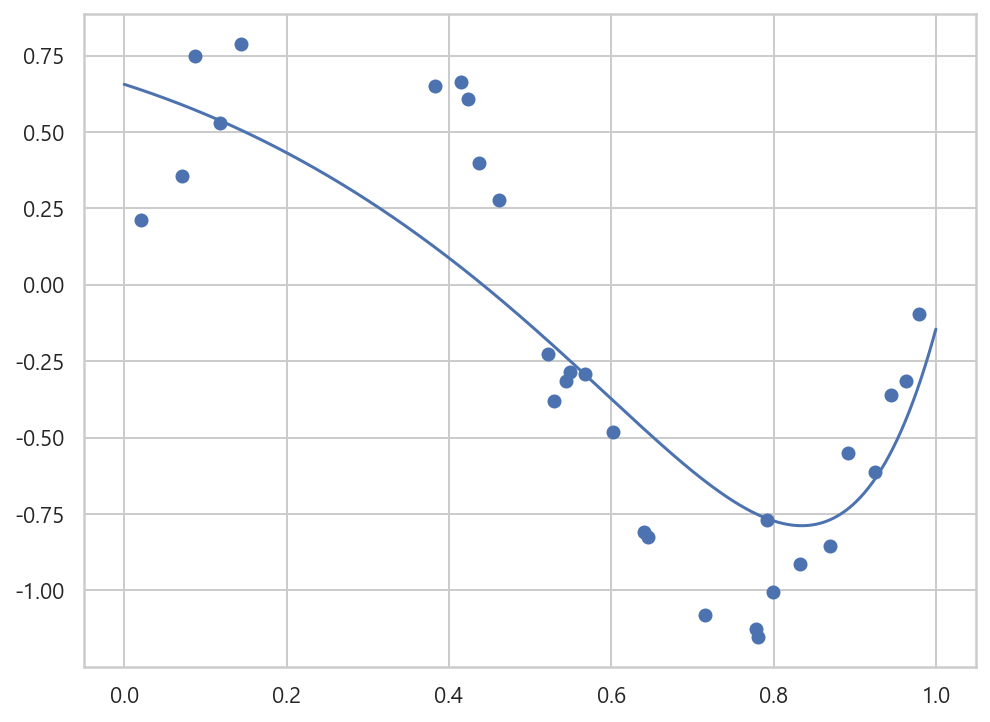

In [27]:
result4 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result4.params)

plt.figure(figsize=(8, 6))
plot_statsmodels(result4)

## 5. Scikit-Learn의 정규화 회귀모형
- Ridge, Lasso, ElasticNet 클래스가 있다.
- 각 모형에 대한 최적화 목적함수
    - **ridge** : $\text{RSS} + \text{alpha} \sum w_i^2$
    - **lasso** : $0.5 \times \text{RSS}/\text{N} + \text{alpha} \sum |w_i|$
    - **elasticnet** : 
    $0.5 \times \text{RSS}/\text{N} + 0.5 \times \text{alpha} \times \left(0.5 \times (1-\text{L1_ratio}) \sum w_i^2 + \text{L1_ratio} \sum |w_i| \right)$
- sklearn의 정규화 모형에서는 정규화 가중치 alpha 값이 하이퍼 파라미터 값과 같다.    

In [8]:
def make_nonlinear(seed=0) : 
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return X, y

### 5-1. sklearn 그래프 함수

In [1]:
def plot_sklearn(model) : 
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

### 5-2. 다항회귀 모형 생성
- 다항식 생성
    - sklearn에서는 PolynomialFeatures로 다항식을 만들 수 있다.
        - statsmodels에서는 OLS 클래스의 포뮬러식으로 다항식을 만들었다.
- 모형 생성
    - 파이프라인 객체에 다항식과 선형회귀클래스를 인수로 입력하여 모형을 만든다.

In [4]:
poly = PolynomialFeatures(9)
poly

PolynomialFeatures(degree=9)

In [15]:
X, y = make_nonlinear()
model = make_pipeline(poly, LinearRegression()).fit(X, y)

In [18]:
print(model.steps)

[('polynomialfeatures', PolynomialFeatures(degree=9)), ('linearregression', LinearRegression())]


### 5-3. 계수 추정값

In [13]:
print(model.steps[1][1].coef_)

[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386451e+04
 -3.84531322e+04  8.35025499e+03]


In [19]:
print(model.steps[1][1].intercept_)

-0.16986281826752592


### 5-4. 원본데이터와 예측값 그래프

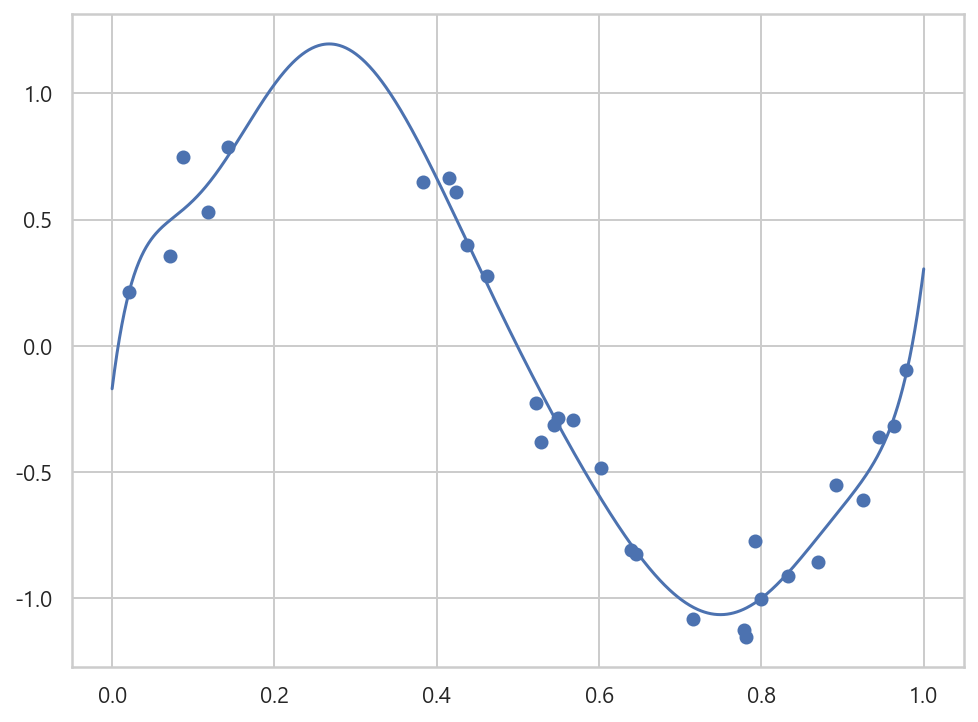

In [21]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plot_sklearn(model)
plt.show() ; 

### 5-5. Ridge 모형으로 예측한 값
- 파이프라인에 Ridge() 모형을 인수로 넣어준다.

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


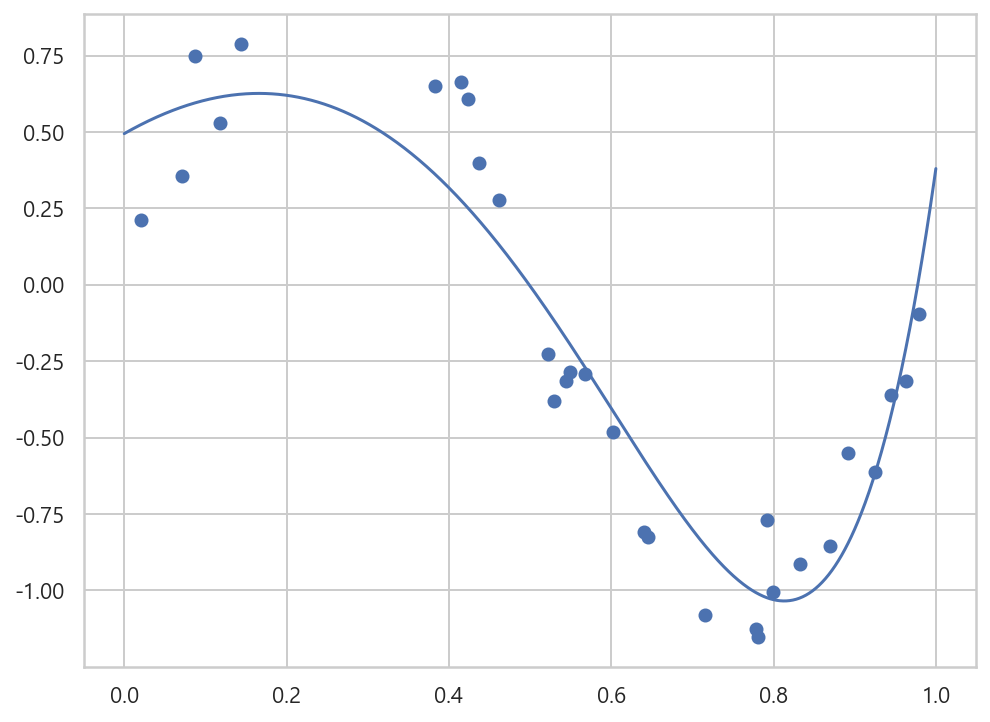

In [24]:
model_ridge = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
print(model_ridge.steps[1][1].coef_)

plt.figure(figsize=(8, 6))
plot_sklearn(model_ridge)

### 5-6. Lasso 모형으로 예측한 값

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


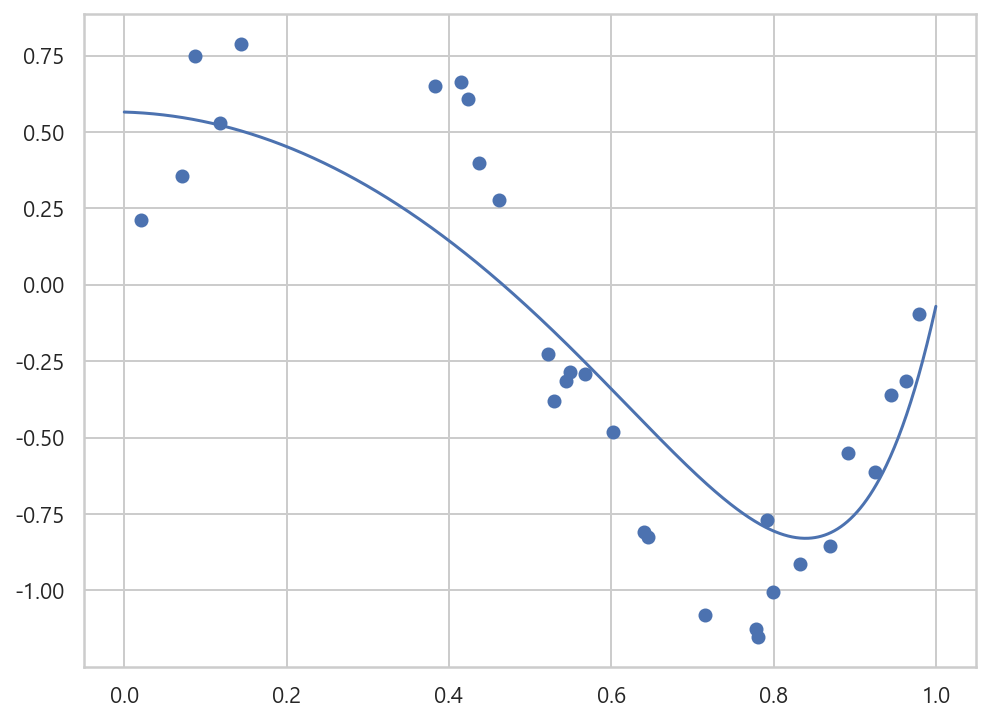

In [25]:
model_lasso = make_pipeline(poly, Lasso(alpha=0.01)).fit(X, y)
print(model_lasso.steps[1][1].coef_)

plt.figure(figsize=(8, 6))
plot_sklearn(model_lasso)

### 5-7. Elastic Net 모형으로 예측한 값

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


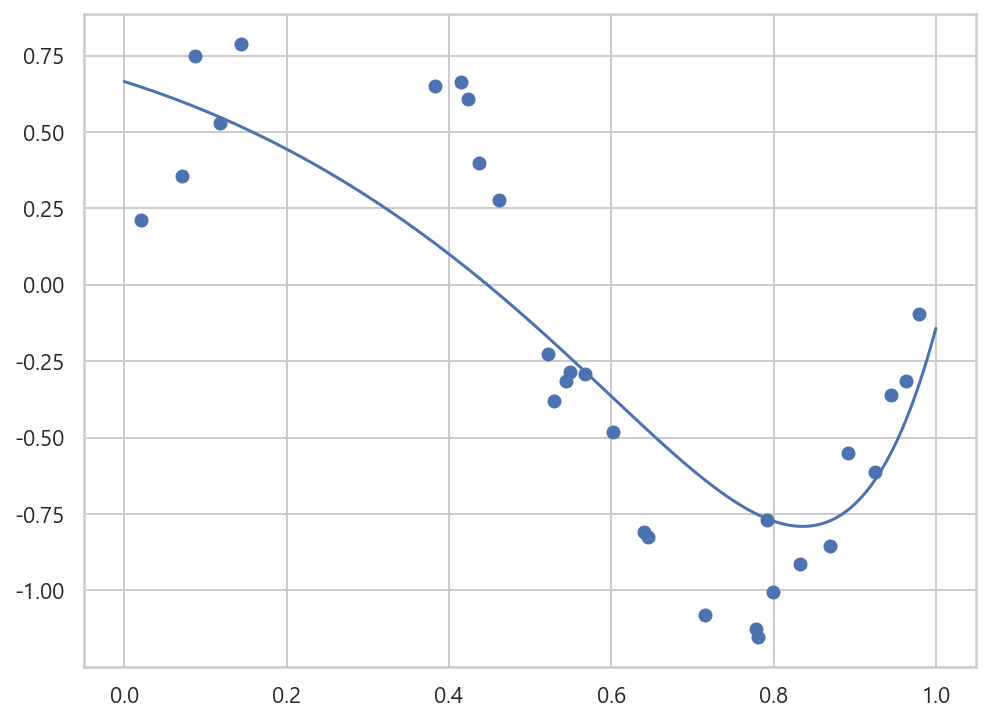

In [26]:
model_elastic = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X, y)
print(model_elastic.steps[1][1].coef_)

plt.figure(figsize=(8, 6))
plot_sklearn(model_elastic)

In [27]:
df_regula = pd.DataFrame(columns=["ridge", "lasso", "elasticnet"])
df_regula

,ridge,lasso,elasticnet


In [30]:
df_regula["ridge"] = model_ridge.steps[1][1].coef_
df_regula["lasso"] = model_lasso.steps[1][1].coef_
df_regula["elasticnet"] = model_elastic.steps[1][1].coef_

In [31]:
df_regula

,ridge,lasso,elasticnet
0,0.000000,0.000000,0.000000
1,1.514304,-0.076689,-0.837680
2,-3.901608,-2.440963,-1.239446
3,-2.635986,-0.000000,-0.501667
4,-0.415268,-0.000000,-0.000000
5,1.075302,0.000000,0.000000
6,1.649133,0.000000,0.000000
7,1.520268,0.000000,0.303822
8,0.946514,0.000000,0.624592
9,0.132996,1.881887,0.842629


## 6. 정규화 모형의 장점과 의미
- **장점** : 회귀 분석에 사용된 데이터가 달라져도 계수가 크게 달라지지 않도록 한다.
    - 즉 학습 데이터로 모형을 훈련시키고 검증 데이터로 모형의 성능을 검증해도 계수가 크게 달라지지 않는다는 의미이다.
- **정규화의 의미** : 정규화 제한조건은 정규화가 없는 최적화 문제에 부등식 제한조건을 추가한 것과 같다.
    - 라그랑지 방법을 이용하여 최적화 문제와 부등식 제한조건을 결합하여 부등식 제한조건이 없는 최적화 문제로 만든것과 같다.

## 7. Ridge 모형과 Lasso 모형의 차이
- Ridge 모형은 가중치 계수를 한꺼번에 축소시킨다.
- Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴한다.

### 7-1. 데이터 임포트

In [32]:
from sklearn.datasets import load_diabetes

In [33]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [37]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [35]:
X[0

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [36]:
y[0]

151.0

### 7-2. alpha 값 생성
- log10의 값 생성
    - log10 -3 : 10^-3 : 0.001

In [38]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [41]:
for i in range(5) :
    print(alpha[i])

0.001
0.01
0.1
1.0
10.0


### 7-3. Ridge 모형으로 alpha 값 별로 계수 추정값 데이터 프레임 생성
- 각 열에 상수항과 독립변수의 계수 추정값이 들어간다.

In [51]:
data = []
for i, a in enumerate(alpha) : 
    print(i, a)
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

0 0.001
1 0.01
2 0.1
3 1.0
4 10.0


,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


#### 계수추정값을 alpha값 별로 데이터 프레임에 넣는 방법
- np.hstack([]) 으로 상수항 계수와 독립변수 계수 추정값을 합쳐준다.
- pd.Seriec() 에 이 배열을 넣어준다.
- data.append() 로 리스트에 한 세트씩 추가한다.

In [44]:
test_r = Ridge(alpha=alpha[0]).fit(X, y)
test_r

Ridge(alpha=0.001)

In [45]:
test_r.intercept_

152.13348416289648

In [46]:
test_r.coef_

array([  -9.55141449, -239.09035369,  520.36336678,  323.82862653,
       -712.3282053 ,  413.38379428,   65.81162885,  167.51377403,
        720.94446754,   68.12209974])

In [48]:
np.hstack([test_r.intercept_, test_r.coef_])

array([ 152.13348416,   -9.55141449, -239.09035369,  520.36336678,
        323.82862653, -712.3282053 ,  413.38379428,   65.81162885,
        167.51377403,  720.94446754,   68.12209974])

In [50]:
pd.Series(np.hstack([test_r.intercept_, test_r.coef_]))

0     152.133484
1      -9.551414
2    -239.090354
3     520.363367
4     323.828627
5    -712.328205
6     413.383794
7      65.811629
8     167.513774
9     720.944468
10     68.122100
dtype: float64

### 7-4. Lasso 모형으로 alpha 값 별로 계수 추정값 데이터 프레임 생성

In [52]:
alpha = np.logspace(-3, 1, 5)
data = []

for i, a in enumerate(alpha) : 
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


### 7-5. Ridge, Lasso 모형 추정 결과 비교

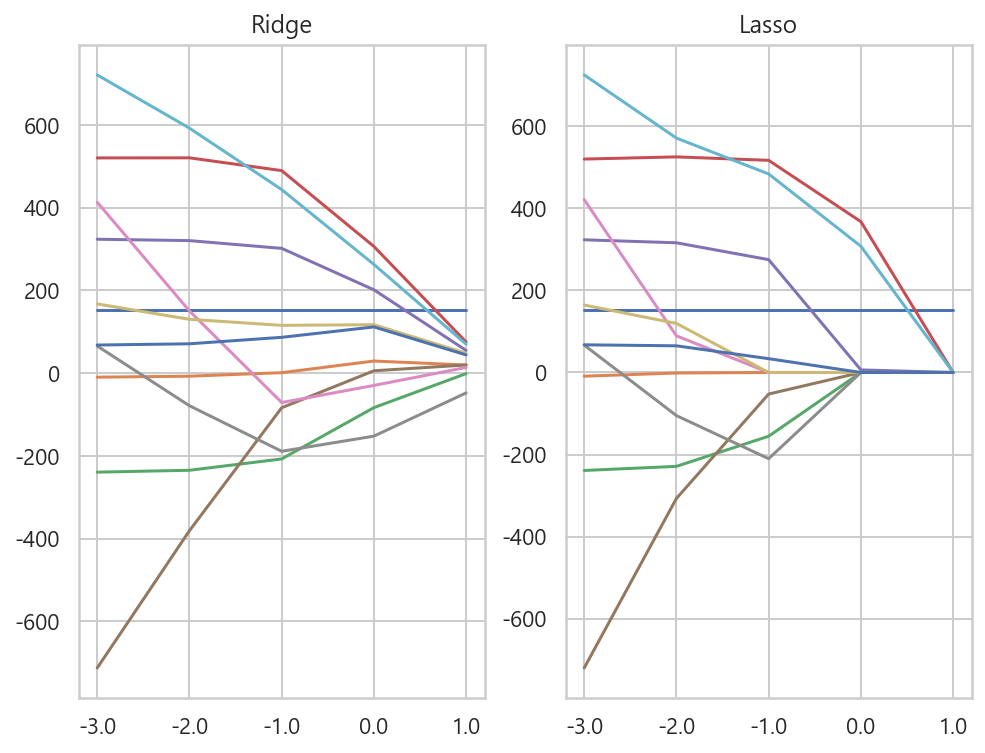

In [54]:
plt.figure(figsize=(8, 6))

ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

plt.show() ;

## 8. 최적 정규화
- 정규화에 사용되는 하이퍼 모수(hyper parameter)를 변화시키면 모형의 검증 성능이 달라진다.
    - 정규화의 목적함수에서 하이퍼 모수의 변화에 따라서 계수값이 변화하기 때문이다.
    - 계수값이 변화하면 모형의 성능이 달라지게 된다.
- `최적 정규화 optimal regularization` : 모형이 최적의 성능을 갖도록 하기 위해서 적절한 정규화 하이퍼 모수의 값을 선택하는 과정

### 8-1. 보스턴 집값 데이터를 사용한 최적 정규화
- 정규화 가중치 \alpha 가 달라지면 학습, 검증용 데이터를 사용한 성능이 달라지게 된다.
    - 학습용 데이터를 사용한 검증은 정규화 가중치 \alpha가 작을 수록 좋아진다.
        - 과최적화 현상과 같다. 왜냐하면 \alpha가 작아지면 계수가 커지기 때문.
        - 학습용 데이터에만 과도하게 최적화 되는 현상이다.
    - 검증용 데이터를 사용한 성능은 정규화 가중치 \alpha가 특정한 범위에 있을때 가장 좋아진다. 

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

In [5]:
len(X), len(y)

(506, 506)

### 8-2. 하이퍼파라미터 모수 샘플 생성

In [6]:
alphas = np.logspace(-4, 0, 200)
alphas

array([1.00000000e-04, 1.04737090e-04, 1.09698580e-04, 1.14895100e-04,
       1.20337784e-04, 1.26038293e-04, 1.32008840e-04, 1.38262217e-04,
       1.44811823e-04, 1.51671689e-04, 1.58856513e-04, 1.66381689e-04,
       1.74263339e-04, 1.82518349e-04, 1.91164408e-04, 2.00220037e-04,
       2.09704640e-04, 2.19638537e-04, 2.30043012e-04, 2.40940356e-04,
       2.52353917e-04, 2.64308149e-04, 2.76828663e-04, 2.89942285e-04,
       3.03677112e-04, 3.18062569e-04, 3.33129479e-04, 3.48910121e-04,
       3.65438307e-04, 3.82749448e-04, 4.00880633e-04, 4.19870708e-04,
       4.39760361e-04, 4.60592204e-04, 4.82410870e-04, 5.05263107e-04,
       5.29197874e-04, 5.54266452e-04, 5.80522552e-04, 6.08022426e-04,
       6.36824994e-04, 6.66991966e-04, 6.98587975e-04, 7.31680714e-04,
       7.66341087e-04, 8.02643352e-04, 8.40665289e-04, 8.80488358e-04,
       9.22197882e-04, 9.65883224e-04, 1.01163798e-03, 1.05956018e-03,
       1.10975250e-03, 1.16232247e-03, 1.21738273e-03, 1.27505124e-03,
      

### 8-3. 하이퍼 파라미터 샘플을 변화하여 모형의 성능 측정
- Lasso 모형 사용
- 성능 지표 : mse(mean squared error) : 평균 제곱 잔차(오차라는 말을 쓰기도함)
    - 오차와 잔차는 다른 개념이다.
    - 잔차 : residual
    - 오차 : disturbance
- 잔차의 크기에 대한 지표이므로 작을 수록 성능이 좋다는 의미이다.
- cross_val_score 클래스는 교차검증 후 성능 검증 함수의 높은 값을 출력해준다. 따라서 mse를 성능 검증 함수로 사용할 경우 작은 값일 수록 좋은 성능을 의미하므로 mse 값에 -를 붙여준 neg_mean_squared_errer 함수를 사용한다.
    - mse에 -를 붙여준 것과 같다.

In [15]:
train_scores = []
test_scores = []

for alpha in alphas : 
    model = Lasso(alpha=alpha)
    train_score = - mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(
        cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)
    
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

In [13]:
test = np.array([3, 4, 1, 5, 2])
test

array([3, 4, 1, 5, 2])

In [14]:
np.argmax(test)

3

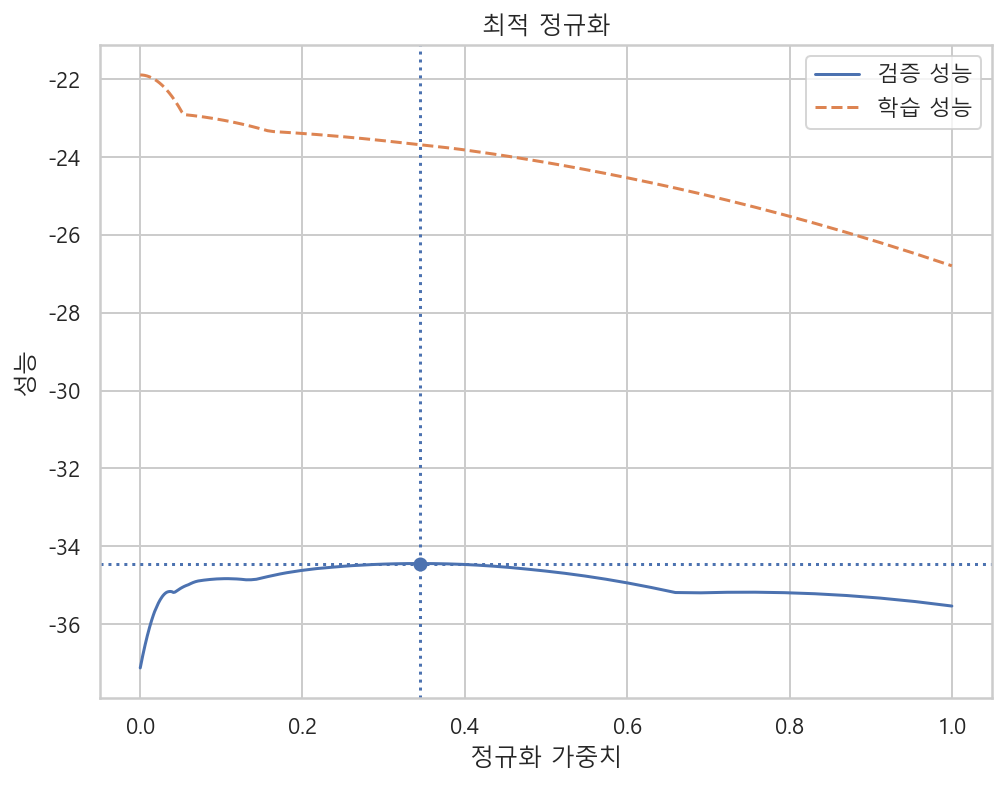

In [20]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.plot(alphas, test_scores, "-", label="검증 성능")
plt.plot(alphas, train_scores, "--", label="학습 성능")
plt.axhline(optimal_score, linestyle=":")
plt.axvline(optimal_alpha, linestyle=":")
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.xlabel("정규화 가중치")
plt.ylabel("성능")

plt.legend()
plt.show() ; 

In [21]:
optimal_score

-34.439569709041926

In [22]:
optimal_alpha

0.34489622604057596

### 8-4. 검증성능 곡선
- `검증성능 곡선 validation curve` : 하이퍼파라미터 모수를 변화시켰을 때 학습성능과 검증성능의 변화를 나타내는 곡선
- validation_curve() 함수를 사용하여 검증성능 곡선을 쉽게 그릴 수 있다.
    - valindation_curve()의 인수를 사용할 때 인수의 이름을 설정해주어야 한다.
    - positional arguments의 갯수 error 가 발생할 수 있다.

In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [4]:
boston = load_boston()
X = boston.data
y = boston.target

In [6]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [7]:
y[:3]

array([24. , 21.6, 34.7])

In [8]:
alphas = np.logspace(-4, 0, 200)
alphas

array([1.00000000e-04, 1.04737090e-04, 1.09698580e-04, 1.14895100e-04,
       1.20337784e-04, 1.26038293e-04, 1.32008840e-04, 1.38262217e-04,
       1.44811823e-04, 1.51671689e-04, 1.58856513e-04, 1.66381689e-04,
       1.74263339e-04, 1.82518349e-04, 1.91164408e-04, 2.00220037e-04,
       2.09704640e-04, 2.19638537e-04, 2.30043012e-04, 2.40940356e-04,
       2.52353917e-04, 2.64308149e-04, 2.76828663e-04, 2.89942285e-04,
       3.03677112e-04, 3.18062569e-04, 3.33129479e-04, 3.48910121e-04,
       3.65438307e-04, 3.82749448e-04, 4.00880633e-04, 4.19870708e-04,
       4.39760361e-04, 4.60592204e-04, 4.82410870e-04, 5.05263107e-04,
       5.29197874e-04, 5.54266452e-04, 5.80522552e-04, 6.08022426e-04,
       6.36824994e-04, 6.66991966e-04, 6.98587975e-04, 7.31680714e-04,
       7.66341087e-04, 8.02643352e-04, 8.40665289e-04, 8.80488358e-04,
       9.22197882e-04, 9.65883224e-04, 1.01163798e-03, 1.05956018e-03,
       1.10975250e-03, 1.16232247e-03, 1.21738273e-03, 1.27505124e-03,
      

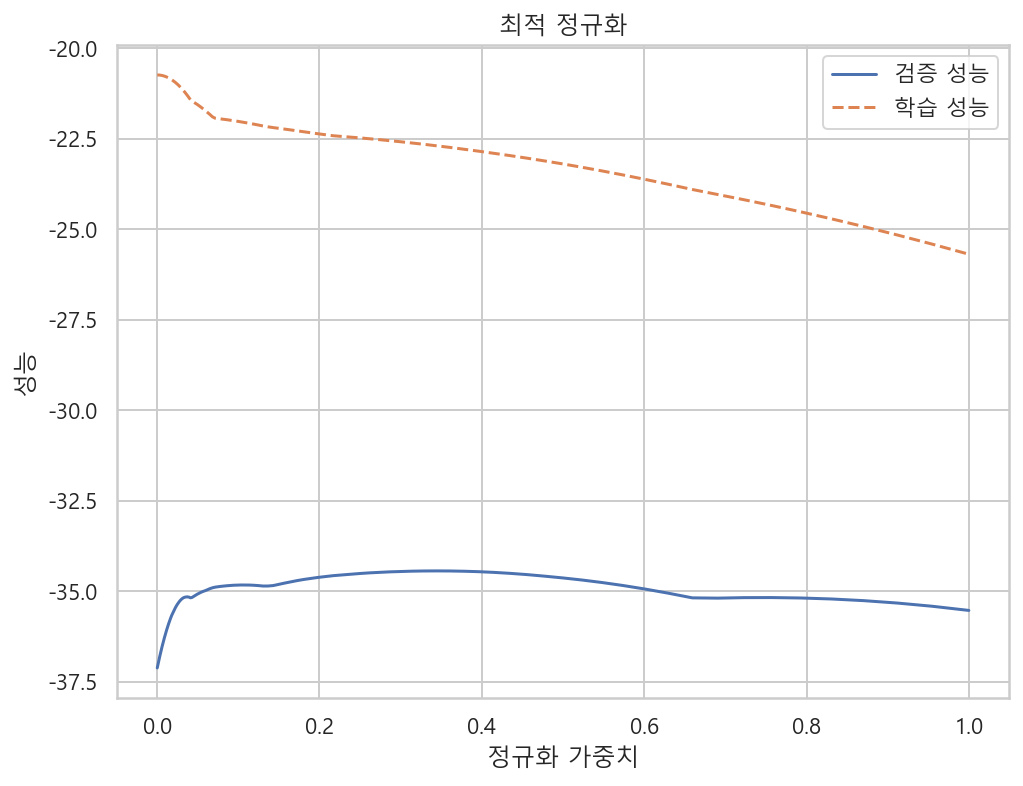

In [12]:
train_scores, test_scores = \
validation_curve(Lasso(), X, y,
                param_name="alpha", param_range=alphas,
                scoring="neg_mean_squared_error")

%matplotlib inline
plt.figure(figsize=(8, 6))
plt.plot(alphas, test_scores.mean(axis=1), "-", label="검증 성능")
plt.plot(alphas, train_scores.mean(axis=1), "--", label="학습 성능")
plt.xlabel("정규화 가중치")
plt.ylabel("성능")
plt.title("최적 정규화")
plt.legend()
plt.show() ; 

### 8-5. 다항회귀의 차수 결정
- 다항회귀에서 차수의 감소, 증가에 따라서 정규화 가중치가 달라진다.
    - 차수가 감소하면 모형의 제약조건이 커진다. 따라서 정규화 가중치가 커진다.
    - 차수가 증가하면 조형의 제약조건이 감소한다. 따라서 정규화 가중치가 작아진다.
- 다항회귀의 차수를 결정하는 문제는 최적 정규화에 해당한다. 
    - 즉 차수를 변화시키면서, 학습성능과 검증성능을 비교하여 최적의 차수를 정한다.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, validation_curve

In [14]:
n_samples = 100
np.random.seed(0)
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.5
X = X[:, np.newaxis]

In [15]:
model = Pipeline(
    [("poly", PolynomialFeatures()), 
     ("lreg", LinearRegression())])
model

Pipeline(steps=[('poly', PolynomialFeatures()), ('lreg', LinearRegression())])

In [17]:
degrees = np.arange(1, 15)
train_scores, test_scores = \
    validation_curve(model, X, y, 
                     param_name="poly__degree", param_range=degrees, 
                     cv=100, scoring="neg_mean_squared_error")

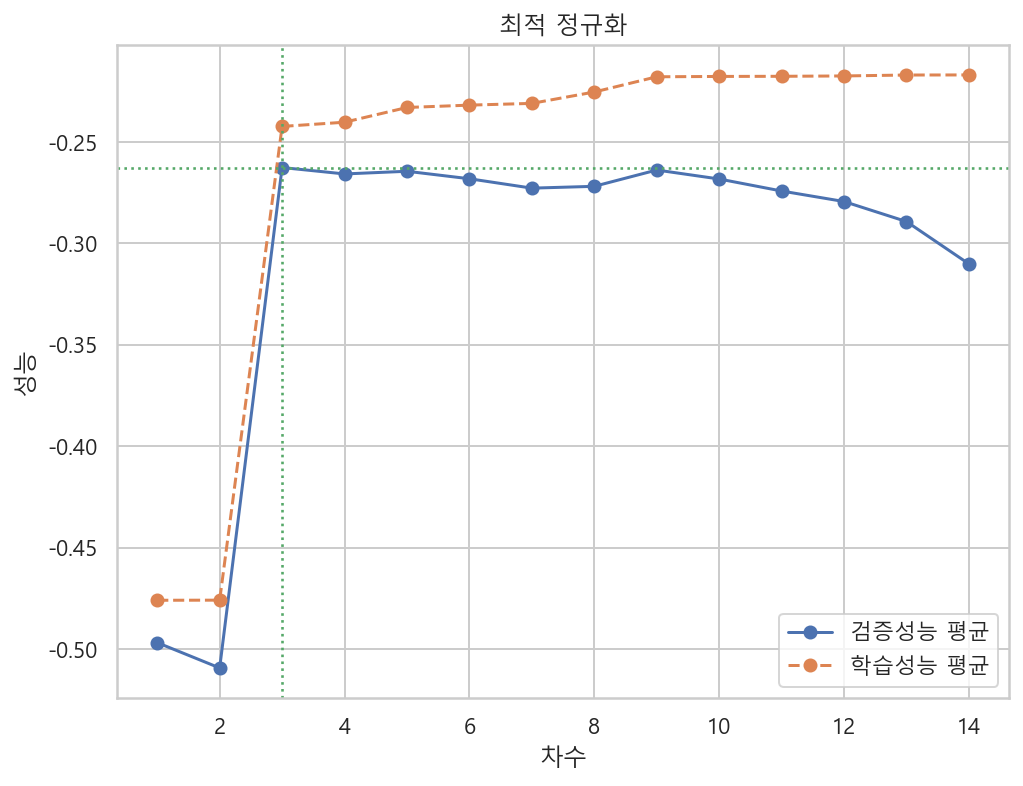

In [65]:
optimal_degree = degrees[np.argmax(test_scores.mean(axis=1))]
optimal_score = np.max(test_scores.mean(axis=1))

plt.figure(figsize=(8, 6))
plt.plot(degrees, test_scores.mean(axis=1), "o-", label="검증성능 평균")
plt.plot(degrees, train_scores.mean(axis=1), "o--", label="학습성능 평균")
plt.axhline(optimal_score, linestyle=":", lw=1.3, c="g")
plt.axvline(optimal_degree, linestyle=":", lw=1.3, c="g")
plt.xlabel("차수")
plt.ylabel("성능")
plt.title("최적 정규화")
plt.legend()
plt.show() ; 

In [48]:
optimal_degree = degrees[np.argmax(test_scores.mean(axis=1))]
optimal_degree

3

In [50]:
optimal_score = np.max(test_scores.mean(axis=1))
optimal_score

-0.2625693318830821